In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df_mod = pd.read_json('modcloth_final_data.json.gz', compression='gzip', lines=True)
print(len(df_mod))
df_mod.head()

82790


,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [8]:
df_mod.dropna()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
7872,154411,34.0,15,5.0,ddd/f,42.0,38.0,new,42,5ft 2in,Cas525,just right,fit,550624,8.0,average,"Cute Dress, not on me, but still cute",This dress was just all kinds of bad on my sho...
7873,154411,27.0,8,5.0,b,37.0,34.0,new,34,5ft 2in,heatherlynnbennett,just right,fit,184506,7.0,average,"Love the dinos, hate the sleeves","Alas! I love the print of this dress and, base..."
8366,155981,30.0,8,5.0,b,41.0,34.0,new,36,5ft 4in,brinkbam,slightly long,fit,10043,7.0,average,holy moly,This is a gorgeous dress! I never spend this k...
8450,157334,26.0,8,5.0,d,38.0,32.0,new,34,5ft 10in,Stephanie,just right,fit,443239,8.5,average,Not for long torsos,I read a review that said this might not work ...
8473,159706,28.0,12,4.0,b,38.0,34.0,new,36,5ft 7in,dawn.koster,just right,small,490075,7.5,average,Size up!,The bodice in this dress is tiny! And I am by ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80851,800975,31.0,15,2.0,ddd/f,39.0,36.0,sale,39,5ft 6in,MaeBeth,just right,small,825897,8.0,wide,Cute print but poor quality and sized way small,"I returned this after barely trying it on, I b..."
80932,801763,36.0,15,3.0,d,42.0,38.0,outerwear,44,5ft 3in,Cara,just right,fit,845475,6.5,wide,Comfortable but not structured,I really like this blazer a lot. The fabric is...
80942,803464,30.0,8,1.0,c,40.0,36.0,outerwear,35,5ft 4in,snufflufagus,just right,fit,680585,8.0,wide,weird tail if you have a booty,"I have glutes. And I do mean glutes, not just ..."
82654,807252,30.0,20,5.0,b,39.0,42.0,outerwear,32,5ft 4in,jessicab1st,just right,fit,326547,7.5,wide,love this coat,"i got the 1x in mustard. beautiful material, t..."


In [9]:
set(df_mod['category'])

{'bottoms', 'dresses', 'new', 'outerwear', 'sale', 'tops', 'wedding'}

In [10]:
set(df_mod['length'])

{'just right',
 nan,
 'slightly long',
 'slightly short',
 'very long',
 'very short'}

In [11]:
set(df_mod['fit'])

{'fit', 'large', 'small'}

In [12]:
df_rent = pd.read_json('renttherunway_final_data.json.gz', compression='gzip', lines=True)
print(len(df_rent))
df_rent.head()

192544


,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [13]:
def weight_clean(row):
    try:
        return int(row.split('l')[0])
    except:
        return np.nan
df_rent['weight'] = df_rent['weight'].apply(weight_clean)    

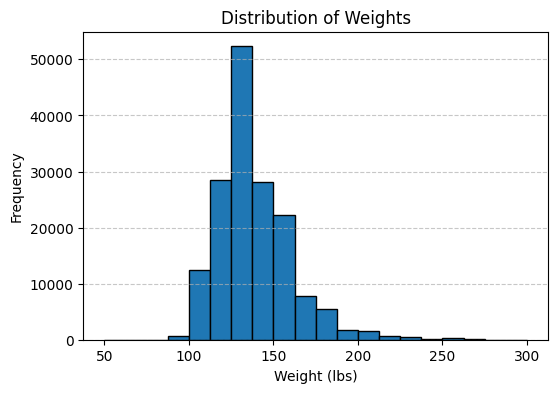

In [14]:
# plotting histogram of companies and the years they were founded
plt.figure(figsize=(6, 4))
plt.hist(df_rent['weight'], bins=20, edgecolor='black')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')
plt.title('Distribution of Weights')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

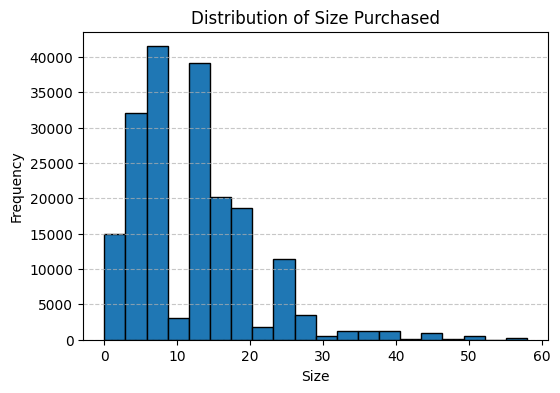

In [15]:
# plotting histogram of companies and the years they were founded
plt.figure(figsize=(6, 4))
plt.hist(df_rent['size'], bins=20, edgecolor='black')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.title('Distribution of Size Purchased')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

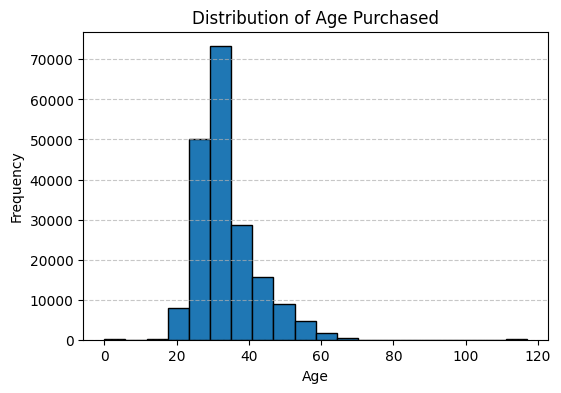

In [16]:
# plotting histogram of companies and the years they were founded
plt.figure(figsize=(6, 4))
plt.hist(df_rent['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age Purchased')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

/var/folders/ff/q2zj5x0j7hn_28kmlfc158t00000gn/T/ipykernel_88655/332011398.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rented for', data=df_rent, palette='viridis')


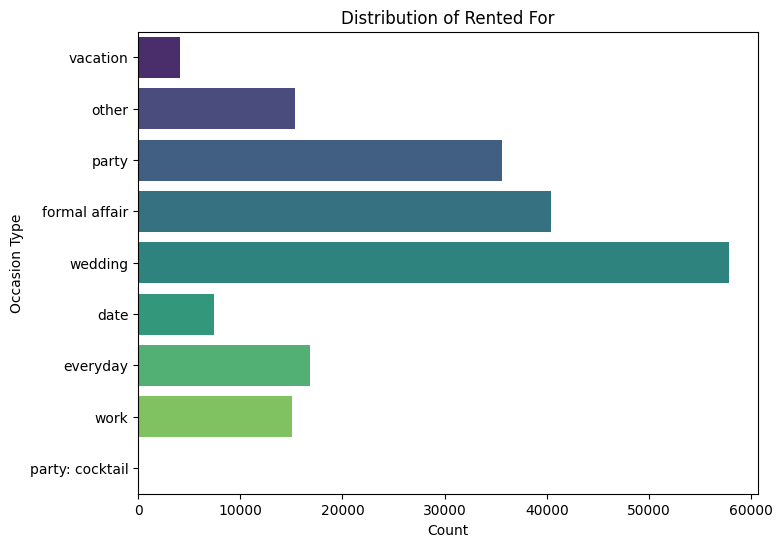

In [17]:
# countplot of number of companies in each employment type
plt.figure(figsize=(8, 6))
sns.countplot(y='rented for', data=df_rent, palette='viridis')
plt.title('Distribution of Rented For')
plt.xlabel('Count')
plt.ylabel('Occasion Type')
plt.show()

/var/folders/ff/q2zj5x0j7hn_28kmlfc158t00000gn/T/ipykernel_88655/1521379304.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='height', data=df_rent, palette='viridis')


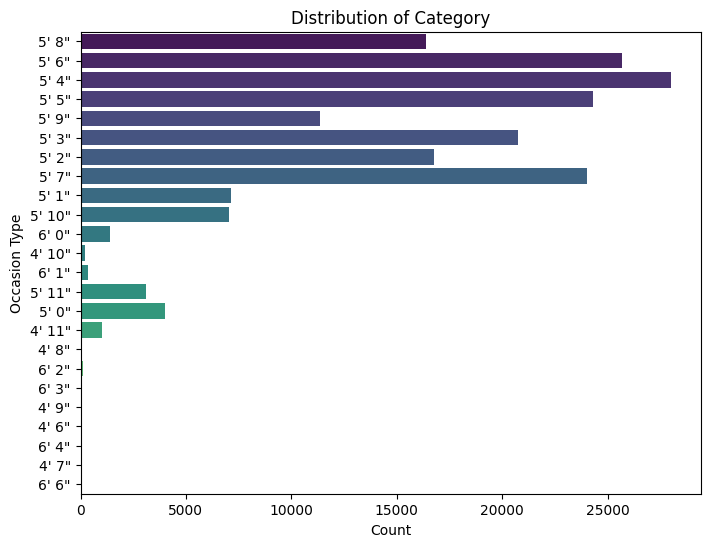

In [18]:
# countplot of number of companies in each employment type
plt.figure(figsize=(8, 6))
sns.countplot(y='height', data=df_rent, palette='viridis')
plt.title('Distribution of Category')
plt.xlabel('Count')
plt.ylabel('Occasion Type')
plt.show()

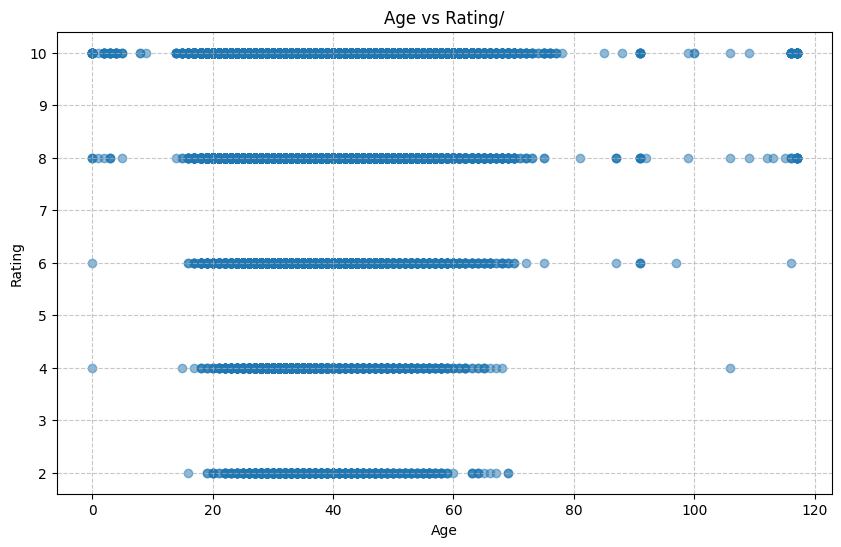

In [19]:
# scatter plot of average company rating vs salary_avg_estimate_per_year
plt.figure(figsize=(10, 6))
plt.scatter(df_rent['age'], df_rent['rating'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Rating')
plt.title('Age vs Rating/')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [20]:
def height_to_meters(height):
    if pd.isna(height):
        return np.nan  # Handle NaN values
    import re
    match = re.match(r"(\d+)' (\d+)\"", height)  # Match feet and inches
    if not match:
        return np.nan  # Return NaN for invalid formats
    feet = int(match.group(1))
    inches = int(match.group(2))
    total_inches = feet * 12 + inches
    meters = total_inches * 0.0254  # Convert inches to meters
    return meters

# Apply the function to the column
df_rent['height_meters'] = df_rent['height'].apply(height_to_meters)


/var/folders/ff/q2zj5x0j7hn_28kmlfc158t00000gn/T/ipykernel_88655/3991924618.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['body type'] = selected_data['body type'].map(body_type_mapping)
/var/folders/ff/q2zj5x0j7hn_28kmlfc158t00000gn/T/ipykernel_88655/3991924618.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['rented for'] = selected_data['rented for'].map(category_mapping)


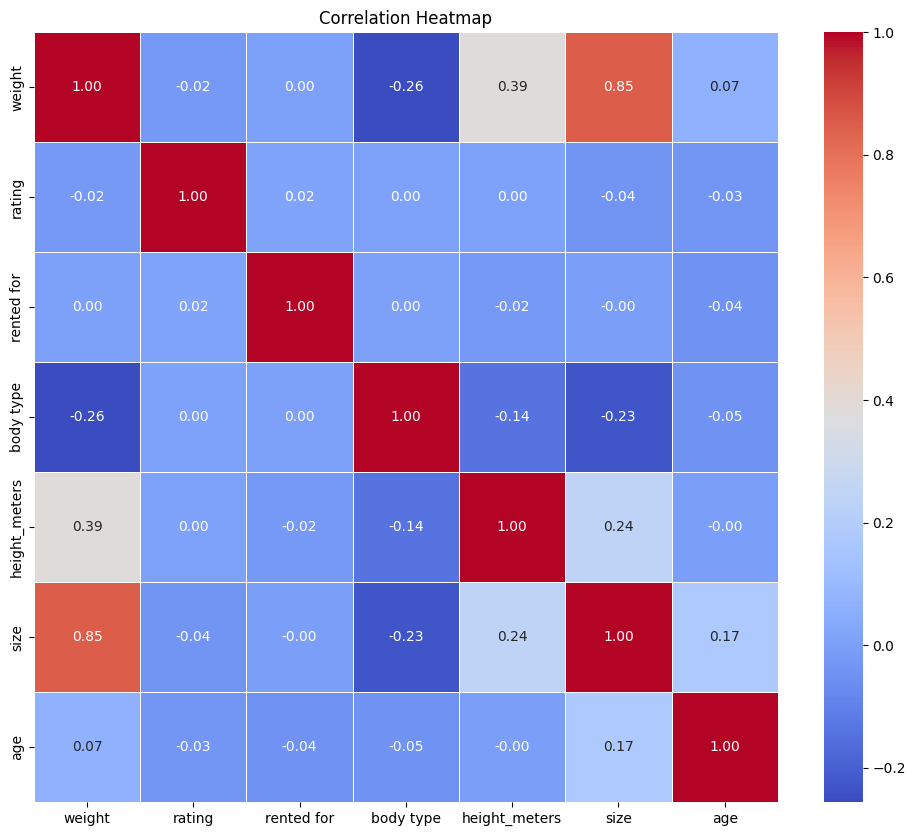

In [21]:
selected_columns = ['weight',
                    'rating', 'rented for','body type',       
'height_meters',      
'size',       
'age',]

selected_data = df_rent[selected_columns]

category_mapping = {
    'date': 1,
    'everyday': 2,
    'formal affair': 3,
    'party': 4,
    'party: cocktail': 5,
    'vacation': 6,
    'wedding': 7,
    'work': 8,
    'other': 9,
    None: 0  # NaN or missing values
}

body_type_mapping = {
    'apple': 1,
    'athletic': 2,
    'full bust': 3,
    'hourglass': 4,
    'pear': 5,
    'petite': 6,
    'straight & narrow': 7,
    None: 0  # Handling NaN or missing values
}

# Map the values
selected_data['body type'] = selected_data['body type'].map(body_type_mapping)

# Map the values
selected_data['rented for'] = selected_data['rented for'].map(category_mapping)



# dropping missing values if there are any in salary_range 
selected_data = selected_data.dropna()

# correlation matrix
correlation_matrix = selected_data.corr()

# correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()